## Focus stacking

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import sys


## Problem 1

In [5]:
def print_matrix(name, A):
    print(f'Matrix {name}:')
    for i in range(A.shape[0]):
        row = A[i, :]
        print(f'{row[0]:.1f}', end='')
        for j in range(1, row.shape[0]):
            print(f', {row[j]:.1f}', end='')
        print()

In [6]:
def rotate(rx,ry,rz):
    Rz = np.array([[math.cos(rz), -math.sin(rz), 0], 
                    [math.sin(rz), math.cos(rz), 0], 
                    [0, 0, 1]])
                        
    Ry = ([[math.cos(ry), 0, math.sin(ry)], 
            [0, 1, 0], 
            [-math.sin(ry), 0, math.cos(ry)]])
    
    Rx = ([[1, 0, 0], 
            [0, math.cos(rx), -math.sin(rx)], 
            [0, math.sin(rx), math.cos(rx)]])

    R = np.dot(np.dot(Rx, Ry), Rz)
    
    return R    

def find_side(r, c):
    dx = 4000
    dy = 6000
    if 0 <= r and r <= dx and 0 <= c and c <= dy:
        return "inside"
    return "outside"
    

def projections(M, points):
    visible = []
    hidden = []
    print("Projections:")
    for i in range(len(points)):
        p = points[i] + [1]
        P = np.dot(M, p)
        Pn = P / P[2] # Normalizing from homogeneous to Cartesian
        r = Pn[1]
        c = Pn[0]
        print(f'{i}: point {points[i][0]:.1f} {points[i][1]:.1f} {points[i][2]:.1f} ==> {r:.1f}, {c:.1f}, {P[2]:.1f}, {find_side(r, c)}')
        if P[2] > 0:
            visible.append(i)
        else:
            hidden.append(i)
        
    print("visible:", *visible)
    print("hidden:", *hidden)
    
def p1_camera(params, points):
    dim = (3, 4)
    dx = 4000
    dy = 6000
    rx,ry,rz = params[0]
    tx,ty,tz = params[1]
    f, d, ic, jc = params[2]

    rx = np.radians(rx)
    ry = np.radians(ry)
    rz = np.radians(rz)
    
    d *= 0.001 # 1 millimeter = 0.001 micorns
    
    R = rotate(rx,ry,rz)

    T = -1 * np.array([[tx],
                  [ty],
                  [tz]])
    

    K = np.array([[f/d, 0, jc],
                  [0, f/d, ic],
                  [0, 0, 1]])

    Rt = np.transpose(R)
    Tt = np.dot(Rt, T)
    M = np.dot(K, np.hstack((Rt, Tt))) 
    
    print_matrix("R", R)
    print_matrix("K", K)
    print_matrix("M", M)

    projections(M, points)


In [7]:
"""
Problem 1, Test 1. This is a very simple test that could be easily checked by hand.
"""
params = [
    [0.0, 0.0, 0.0], 
    [0.0, 0.0, 10.0],
    [15, 10, 2001, 2995]
]
points = [
    [10, 5, 100],
    [0, 0, 0.5],
    [-30, 10, -20],
    [20, 15, 20]
]

p1_camera(params, points)


Matrix R:
1.0, 0.0, 0.0
0.0, 1.0, 0.0
0.0, 0.0, 1.0
Matrix K:
1500.0, 0.0, 2995.0
0.0, 1500.0, 2001.0
0.0, 0.0, 1.0
Matrix M:
1500.0, 0.0, 2995.0, -29950.0
0.0, 1500.0, 2001.0, -20010.0
0.0, 0.0, 1.0, -10.0
Projections:
0: point 10.0 5.0 100.0 ==> 2084.3, 3161.7, 90.0, inside
1: point 0.0 0.0 0.5 ==> 2001.0, 2995.0, -9.5, inside
2: point -30.0 10.0 -20.0 ==> 1501.0, 4495.0, -30.0, inside
3: point 20.0 15.0 20.0 ==> 4251.0, 5995.0, 10.0, outside
visible: 0 3
hidden: 1 2


In [8]:
'''
Problem 1, Test 2
'''
params = [
    [15.0, -45.0, 10.0],
    [4.0, 30.0, 10.0],
    [12, 12, 1998, 3005]
]
points = [
    [100, 15, 90],
    [-100, 800, 1500],
    [10, -500, -500],
    [-30, 10, 20]
]
p1_camera(params, points)


Matrix R:
0.7, -0.1, -0.7
-0.0, 1.0, -0.2
0.7, 0.1, 0.7
Matrix K:
1000.0, 0.0, 3005.0
0.0, 1000.0, 1998.0
0.0, 0.0, 1.0
Matrix M:
-1428.5, -562.5, 2770.0, -5112.7
-1535.6, 617.4, 1500.9, -27388.2
-0.7, -0.2, 0.7, 1.5
Projections:
0: point 100.0 15.0 90.0 ==> 3487.2, -8851.4, -10.5, outside
1: point -100.0 800.0 1500.0 ==> 3021.6, 4043.8, 950.3, inside
2: point 10.0 -500.0 -500.0 ==> 4311.3, 4394.6, -255.6, outside
3: point -30.0 10.0 20.0 ==> 1589.0, 2534.4, 34.5, inside
visible: 1 3
hidden: 0 2


In [9]:
'''
Problem 1, Test 3
'''
params = [
    [-16.0, 10.0, 50.0],
    [25, -12, 50],
    [9, 9, 1000, 1400]
]
points = [
    [100, 15, 90],
    [-100, 800, 1500],
    [10, -500, -500],
    [-30, 10, 20]    
]
p1_camera(params, points)

Matrix R:
0.6, -0.8, 0.2
0.7, 0.7, 0.3
-0.3, -0.0, 0.9
Matrix K:
1000.0, 0.0, 1400.0
0.0, 1000.0, 1000.0
0.0, 0.0, 1.0
Matrix M:
876.1, 1085.6, 1006.9, -59219.4
-580.8, 926.0, 897.4, -19236.6
0.2, 0.3, 0.9, -48.4
Projections:
0: point 100.0 15.0 90.0 ==> 297.8, 2323.9, 58.2, inside
1: point -100.0 800.0 1500.0 ==> 1352.8, 1420.4, 1571.4, inside
2: point 10.0 -500.0 -500.0 ==> 1428.5, 1672.5, -655.7, inside
3: point -30.0 10.0 20.0 ==> -794.1, 1704.6, -32.0, outside
visible: 0 1
hidden: 2 3


## Problem 2

In [10]:
def load_points(fn):
    '''
    Input: a path to a file containing x, y points, one point per line.
    Returns: two-d np array where each row contains an x, y point
    '''
    f = open(fn, 'r')
    pts = []
    for line in f:
        line = line.strip().split()
        x, y = float(line[0]), float(line[1])
        pts.append([x, y])
    pts = np.array(pts)
    f.close()
    return pts

In [11]:
def p2_ransac(fn, samples, tau, seed):
    points = load_points(fn);
    N = len(points)
    np.random.seed(seed)

    best_inlier_dist = 0 
    best_outlier_dist = 0
    best_line = 0
    
    for i in range(samples):
        sample = np.random.randint(0, N, 2)
        if sample[0] != sample[1]:
            pt1 = points[sample[0]] 
            pt2 = points[sample[1]]
            x0,y0 = pt1
            x1,y1 = pt2
            a = y0-y1
            b = x1-x0
            c = x0*y1 - x1*y0
            norm = np.sqrt(a**2 + b**2)
            a /= norm
            b /= norm
            c /= norm
            if c>0:
                a *=-1
                b *=-1
                c *=-1

            inliers = 0
            inlier_dist = 0 
            outlier_dist = 0
            for p in points:
                x, y = p
                d = np.abs(a*x + b*y + c) / np.sqrt(a**2 + b**2)
                if d <= tau:
                    inliers += 1
                    inlier_dist += d
                else:
                    outlier_dist += d
            if best_line < inliers:
                best_inlier_dist = inlier_dist
                best_outlier_dist = outlier_dist
                inlier_pts = inliers
                outlier_pts = N-inliers
                best_line = inliers
                print(f'Sample {i}:')
                print(f'indices ({sample[0]}, {sample[1]})')
                print(f"line ({a:.3f}, {b:.3f}, {c:.3f})")
                print(f'inliers {inliers}')
                print()
            
    print(f'avg inlier dist {best_inlier_dist/inlier_pts:.3f}')
    print(f'avg outlier dist {best_outlier_dist/outlier_pts:.3f}')
    

In [12]:
'''
Problem 2, Test 1
'''
fn = 'data/p2_pts1_in.txt'
samples = 25
tau = 2.5
seed = 999
p2_ransac(fn, samples, tau, seed)


Sample 0:
indices (0, 28)
line (-0.983, 0.184, -26.286)
inliers 13

Sample 3:
indices (27, 25)
line (0.426, 0.905, -4.913)
inliers 19

Sample 10:
indices (23, 4)
line (0.545, 0.838, -0.944)
inliers 21

avg inlier dist 0.739
avg outlier dist 8.920


In [13]:
'''
Problem 2, Test 2
'''
fn = 'data/p2_pts2_in.txt'
samples = 35
tau = 3.0
seed = 1232
p2_ransac(fn, samples, tau, seed)


Sample 0:
indices (6, 15)
line (-0.023, -1.000, -19.478)
inliers 16

Sample 2:
indices (46, 20)
line (0.178, -0.984, -11.491)
inliers 21

Sample 4:
indices (75, 52)
line (0.500, 0.866, -0.018)
inliers 30

Sample 17:
indices (58, 18)
line (-0.408, -0.913, -1.201)
inliers 35

avg inlier dist 1.383
avg outlier dist 10.267


## Problem 4


In [14]:
'''
Utility for Problem 4
'''
import os

def get_images(img_dir):
    start_cwd = os.getcwd()
    os.chdir(img_dir)
    names = os.listdir('./')
    names = [name for name in names if 'jpg' in name.lower()]
    names.sort()

    images = []
    for n in names:
        im = cv2.imread(n)
        im = im.astype(np.float32)
        if im is None:
            print('Could not open', n)
            sys.exit(0)
        images.append(im)

    os.chdir(start_cwd)
    return names, images


In [38]:
def energy(im, sigma):
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_dx = cv2.Sobel(im_gray, cv2.CV_32F, 1, 0)
    im_dy = cv2.Sobel(im_gray, cv2.CV_32F, 0, 1)
    h = int(2.5 * sigma)
    ksize = (2*h+1, 2*h+1)
    E = im_dx ** 2 + im_dy ** 2
    gaussian = cv2.GaussianBlur(E, ksize, sigma)
    return gaussian

def combine_imgs(p, images, E):  
    s = np.sum(E, axis=0)
    print( "0's:", np.sum(s == 0))
    s[s == 0] = 1
    E_norm = E / s
    I = np.sum(np.expand_dims((np.power(E_norm, p)), axis=-1) * images, axis=0)   
    s = np.sum(E_norm ** p, axis=0)
    s[s == 0] = 1
    I /= np.expand_dims(s, axis=-1)
    I = np.round(I).astype(np.uint8)
    I += 255
    return I


def p4_sharp_focus(image_dir, sigma, p):
    names, imgs = get_images(image_dir)
    E = []
    for im in imgs:
        E.append(energy(im, sigma))
    
    focused_img = combine_imgs(p, imgs, E)

    M, N, _ = focused_img.shape
    pixels = [(M//3, N//3), (M//3, 2*N//3), (2*M//3, N//3), (2*M//3, 2*N//3)]
    
    for i, pixel in enumerate(pixels):
        print(f'Energies at {pixel}:')
        x, y = pixel
        for j, im in enumerate(imgs):
            print(f'{j}: {E[j][x][y]:.1f}')
        print(f'RGB: {int(focused_img[x, y][2])}, {int(focused_img[x, y][1])}, {int(focused_img[x, y][0])}')
        print()
        
    plt.figure(figsize=(20, 20)) 
    plt.imshow(focused_img.astype('uint8'))
    plt.show()

    

0's: 366
Energies at (300, 208):
0: 2817.9
1: 2578.0
2: 2384.7
3: 2461.7
4: 2423.4
5: 2438.2
RGB: 140, 138, 136

Energies at (300, 417):
0: 100.1
1: 1244.4
2: 3139.1
3: 3286.9
4: 1391.8
5: 1610.1
RGB: 203, 227, 187

Energies at (600, 208):
0: 81.4
1: 1099.8
2: 3137.7
3: 3312.0
4: 1771.9
5: 1676.1
RGB: 109, 90, 87

Energies at (600, 417):
0: 4792.0
1: 291.2
2: 109.3
3: 123.4
4: 96.2
5: 88.3
RGB: 33, 33, 35



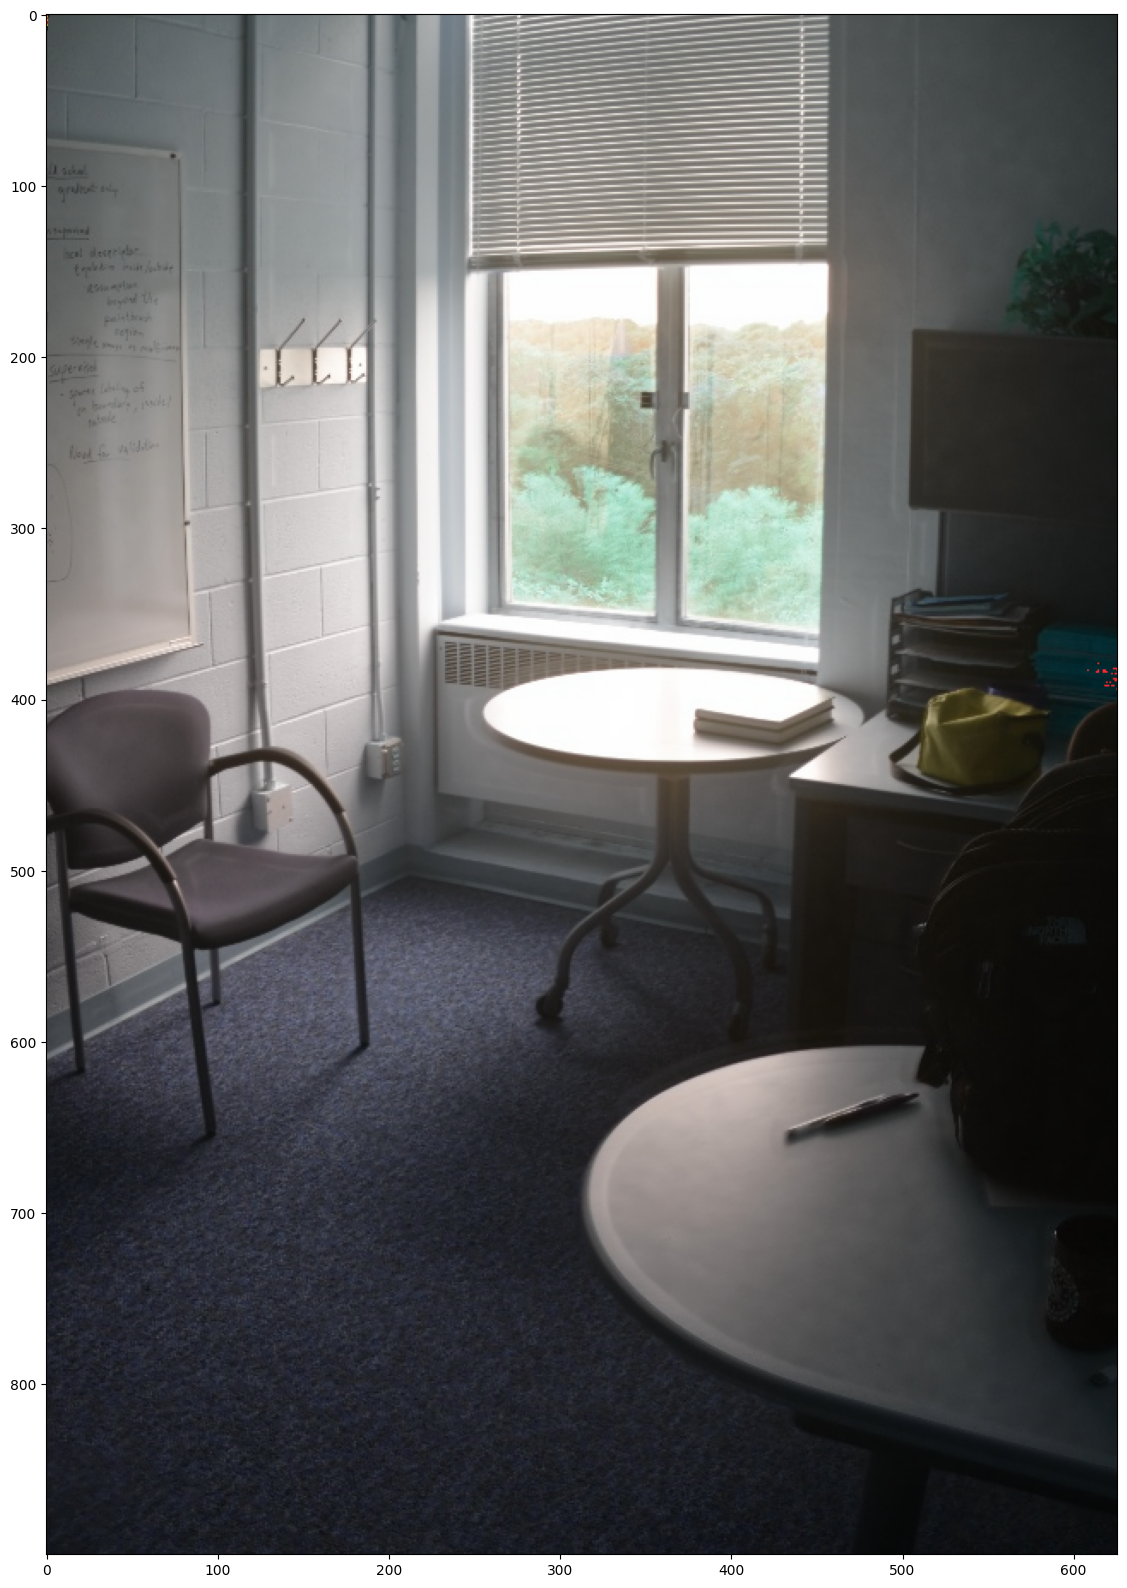

In [43]:
image_dir = 'data/office'
sigma = 3.0
p = 2
p4_sharp_focus(image_dir, sigma, p)

0's: 0
Energies at (133, 200):
0: 887.9
1: 326.5
2: 998.8
3: 7664.4
4: 546.4
5: 77.8
RGB: 37, 36, 34

Energies at (133, 400):
0: 105.8
1: 1508.2
2: 4064.2
3: 44264.8
4: 19893.2
5: 13577.7
RGB: 136, 135, 147

Energies at (266, 200):
0: 222.2
1: 1422.3
2: 5666.5
3: 36372.3
4: 171.8
5: 126.0
RGB: 41, 36, 32

Energies at (266, 400):
0: 30.1
1: 491.7
2: 5341.3
3: 27525.5
4: 22107.0
5: 9449.8
RGB: 78, 71, 69



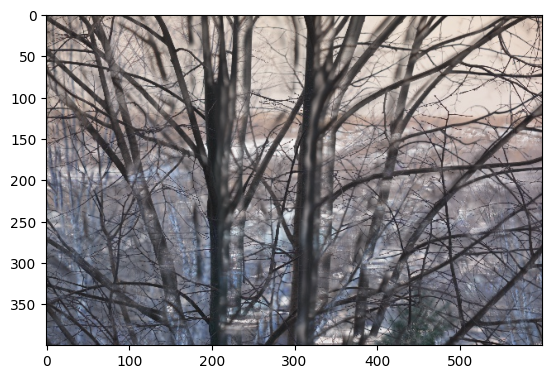

In [31]:
image_dir = 'data/branches'
sigma = 5.0
p = 2
p4_sharp_focus(image_dir, sigma, p)

## Problem 4 Discussion

Results of your program: what works well, what works poorly, and why this might
be. Illustrate with examples where you can. This part is worth 8 points toward your grade
on this homework


The program is supposed to take multiple images which have different areas out of focus, and combine them into one focused image by using the energies of the combined photos.

### Things that work well:

**Blending focused images:**
The images are combined well into one and it successfully retains the parts are that in focus into the final image. The office image is all in focus and looks visually correct. Also, despite the tree branch image having misalignments and blurry areas, all of the areas of image are constantly in focus.

### Things that work poorly:

**Misalignment:** When the images are misaligned, such as the one of the tree, the images don't combine as well and we are left with blur around the focal areas. The program doesn't blend complex images well and can't calculate the main focus when the objects are shifted. 

**Ghost halo:** There is also a halo around some objects such as the table from the office image. This is because the program doesn't blend the in-focus with out-of-focus regions well. Increasing the sigma helps reduce the halo and makes the image smoother.

